# Описание проекта

Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных

* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1. Откроем файл и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 2. Подготовим данные

Мне не нравится Year_of_Release и User_Score переведу их в int (год будет удобнее читаться, ну а оценки улобнее считать с числах, а не тексте)) Приведем названия стобцов к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()
data.columns #проверим

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# data = data.astype({'year_of_release':'int'})
# пропуски мешают

In [7]:
# посмотрим кол-во пропусков
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# посмотрим на пропуски в процентном соотношении
data.isnull().sum().sort_values(ascending = False) / data.shape[0] * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Пропуски в year_of_release всего 1.6%, заменять это медианами или какими-либо еще значениями будет не правильно. Удалить их будет, наверно, самым верным решением, так будет меньше искажений. В name и genre по 2 пропуска, так же избавимся от них

In [9]:
data.dropna(subset = ['year_of_release'], inplace = True)
data.dropna(subset = ['name'], inplace = True)
data.dropna(subset = ['genre'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [10]:
# приведем даты к типу  int
data = data.astype({'year_of_release':'int'})
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В user_score пропусков слишком много, трогать их не будем, но это мешает привести к типу int, что ж float нам тоже подойдет.

In [11]:
#data = data.astype({'user_score':'float'})
# снова здорова! теперь 'tbd' мешает, посмотрим что это

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data[data['user_score'] == 'tbd']['user_score'].count()

2376

Из надежных источников узнала, что tbd значит "to be defined" т.е. "не определен", а раз не определен - пускай будет nan.

In [14]:
#заменим 'tbd' на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data = data.astype({'user_score':'float'}) # приводим к типу float
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
data['rating'] = data['rating'].fillna('not defined')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Добавим столбец с суммарными продажами по всем регионам.

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head() #проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not defined,31.38


# Проведем исследовательский анализ данных

## 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

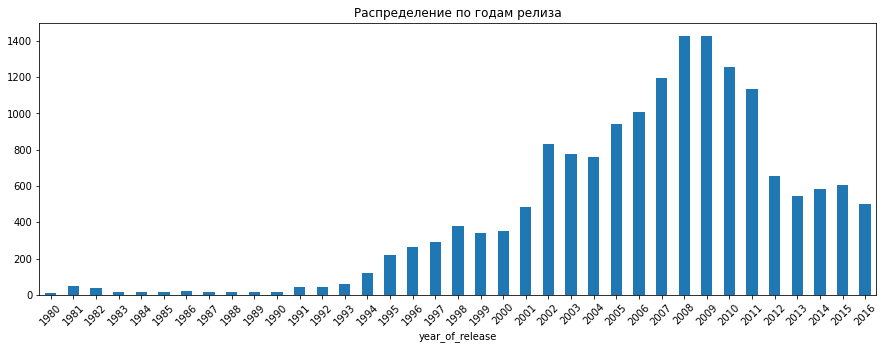

In [17]:
plt.figure(figsize = (15, 5))
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', rot=45)
plt.title('Распределение по годам релиза');

У нас есть данные начиная с 1980г. Тем не менее до 90х игры выходили в очень малых количествах. С 94г виден более активный рост и кол-во выпускаемых игр можно исчислять сотнями. В 2008 и 2009гг - пик выпуска игр, затем виден явный спад, особенно между 2011 и 2012 годами. Нет смысла рассматривать все периоды, игры в 80х и 10х - небо и земля. С каждым годом игры становятся сложнее, на создание игр уходит по нескольку лет, игры становятся дороже + появляются конкуренты на мобильных платформах. Я бы рассматривала период не более 10 лет - с 2006 до 2016, достаточный период затрагивает и пик и спад выпуска игр.

## 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.

In [18]:
# выберем топ 10
top_10 = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(10).index

In [19]:
top_10

Index(['3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

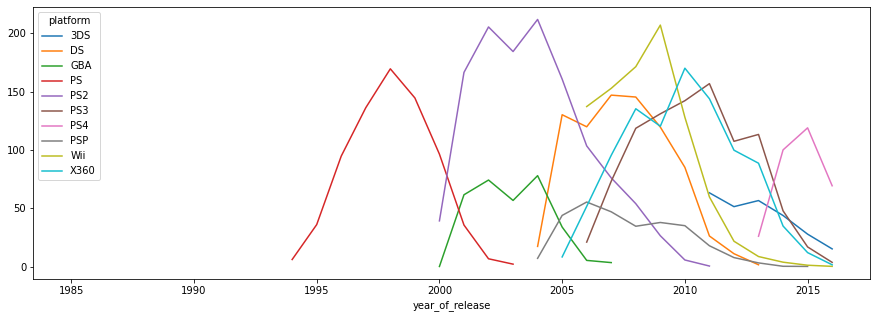

In [20]:
# построим график продаж у top_10
data.query('platform in @top_10').pivot_table(index='year_of_release', columns='platform',
                                              values='total_sales', aggfunc='sum').plot(figsize = (15, 5));

Чисто визуально кажется, что средний срок жизни платформ около 10 лет. Но нам нужно знать более точно.

In [21]:
df = data.copy() # на всякий пожарный сделаем копию исходного фрейма 
pivot = df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').T

live_times = pivot[top_10].T.stack().reset_index()

for platform in top_10: # напишем функию для срока жизни платформ
    current_platform = live_times.query('platform == @platform')
    live_time = current_platform['year_of_release'].max() - current_platform['year_of_release'].min() # срок жизни
    top_sales = current_platform[0].max() # максимальные продажи
    top_sales_year = current_platform[current_platform[0] == top_sales]['year_of_release'].values[0] \
                                      - current_platform['year_of_release'].min() # год максимальных продаж для платформы
    print(f'Срок жизни платформы {platform} {live_time} лет, максимум продаж через {top_sales_year} лет')

Срок жизни платформы 3DS 5 лет, максимум продаж через 0 лет
Срок жизни платформы PSP 11 лет, максимум продаж через 2 лет
Срок жизни платформы GBA 7 лет, максимум продаж через 4 лет
Срок жизни платформы PS4 3 лет, максимум продаж через 2 лет
Срок жизни платформы PS 9 лет, максимум продаж через 4 лет
Срок жизни платформы DS 28 лет, максимум продаж через 22 лет
Срок жизни платформы Wii 10 лет, максимум продаж через 3 лет
Срок жизни платформы PS3 10 лет, максимум продаж через 5 лет
Срок жизни платформы X360 11 лет, максимум продаж через 5 лет
Срок жизни платформы PS2 11 лет, максимум продаж через 4 лет


Ну что же, визуальный осмотр был правильным) Если не брать во внимание фантастически долгую жизнь DS и короткую PS4(она еще живет), то в среднем платформы актуальны 10 лет, а максимум продаж приходится на 2-4 года продаж.

## 3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор - эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.


Итак, нас интересует актуальный период. Логичнее выпускать игры для платформы пока она на пике, в первой половине жизни платформы. По графику у нас всего 2 платформы более или менее живые - 3DS и PS4. Мне этого мало. До этого мы так же вычислили, что максимальных продаж платформа достигает через 2-4 года, возьмем среднее 3 года. Будем изучать данные за последние 3 года - с 2013 по 2016.

In [22]:
# создаем новый фрейм для платформ, продающих с 2013  по 2016 года
data_new = data.query('year_of_release >= 2013')
data_new['platform'].unique() #посмотрим какие платформы вошли

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

## 4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

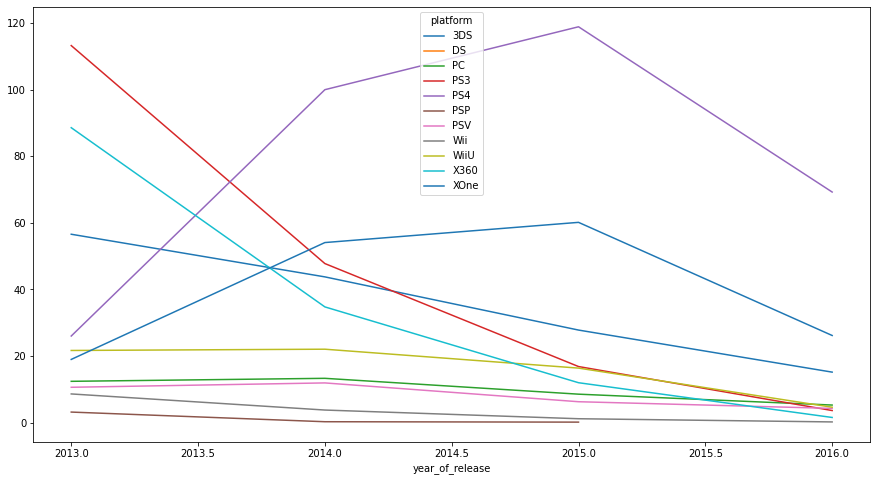

In [23]:
# посмотрим на графике, что тут по продажам.
data_new.pivot_table(index='year_of_release', columns='platform',
                     values='total_sales', aggfunc='sum').plot(figsize = (15, 8));

В целом весь график удручает, продажи падают везде. PS4, XOne - новые платформы, они только начали свой путь, и у 3DS еще есть шансы, они недавно выпущены и их жизненный цикл еще не подходит к концу.  Одни и те же игры выходят одновременно на нескольких платформах, как новых так и старых, именно это еще поддерживает старые платформы на плаву. Хочу выделить топ 5 платформ за это время.

In [24]:
# выделим топ 5 платформ, по ним и будем работать.
top_5 = data_new.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(5).index
top_5

Index(['X360', '3DS', 'XOne', 'PS3', 'PS4'], dtype='object', name='platform')

In [25]:
top_5_platform = data_new[data_new['platform'].isin(top_5)] #создаем фрейм с выбранными платформами
top_5_platform.head() #проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,not defined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Если мне не изменяет память, то именно эти платформы и были актуальны в то время, так что меня этот список платформ устраивает.

## 5.Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

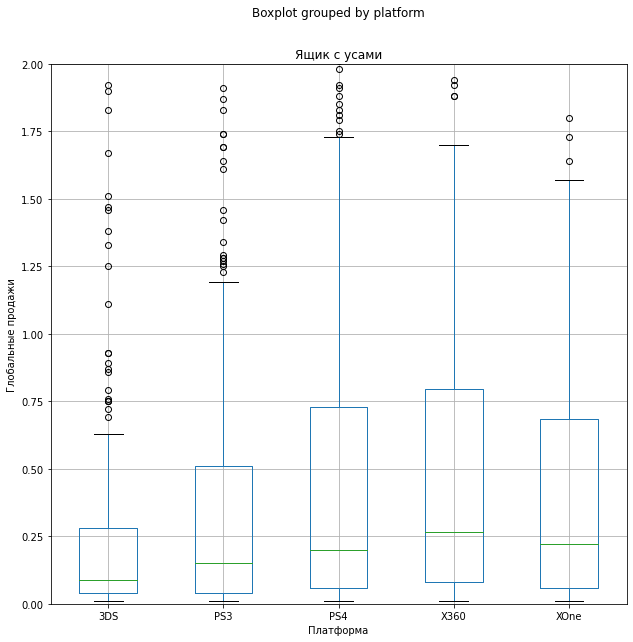

In [26]:
# построим "ящик с усами" по глобальным продажам игр
top_5_platform.boxplot(column='total_sales', by='platform', figsize=(10, 10))
plt.ylim(0, 2)
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

Больше всего игр продается на Х360 (тут ничего удивительного, это можно сказать культовая консоль), далее новые и самые актуальные консоли PS4 и XOne. Хуже из этой пятерки продаются игры к 3DS, ее вообще скорее всего вытягивает азиатский рынок, но не будем забегать вперед.

## 6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Изучим PS4. 

0.406567902061781
-0.031957110204556376


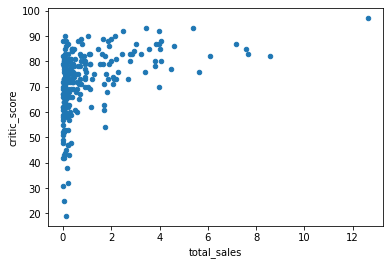

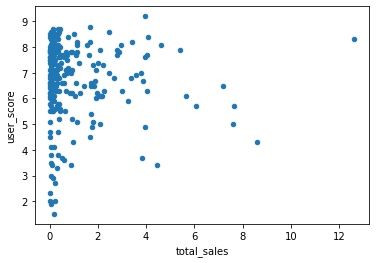

In [27]:
name = 'PS4'
print(top_5_platform.query('platform == @name')['total_sales']\
      .corr(top_5_platform.query('platform == @name')['critic_score']))
top_5_platform.query('platform == @name').plot(x = 'total_sales',
                                               y = 'critic_score', kind = 'scatter');
print(top_5_platform.query('platform == @name')['total_sales']\
      .corr(top_5_platform.query('platform == @name')['user_score']))
top_5_platform.query('platform == @name').plot(x = 'total_sales',
                                               y = 'user_score', kind = 'scatter');

Оценка критиков довольно сильно влияет на продажи. На диагарамме рассеяния виден явный треугольник, показывающий, чем выше оценка - тем больше продаж.

А вот оценка пользователей никак не влияет на продажи. Есть отличные продажи у игр, получивших оценку даже ниже 5.

Если выбирать на чьи оценки ориентироваться, то это безусловно критики.

## 7.Соотнесите выводы с продажами игр на других платформах.

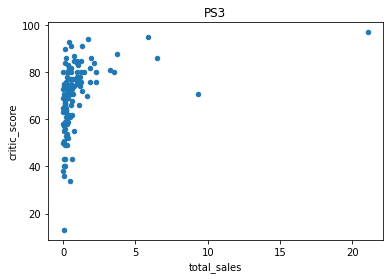

0.3342853393371919


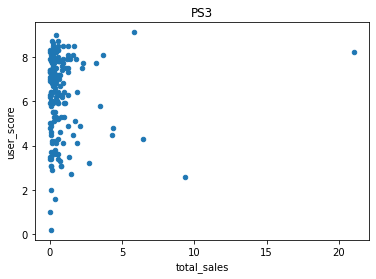

0.0023944027357566925


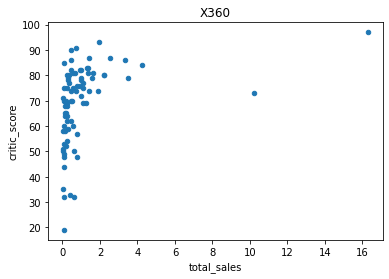

0.3503445460228664


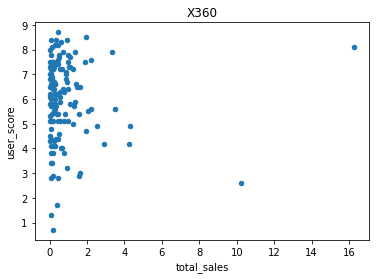

-0.011742185147181342


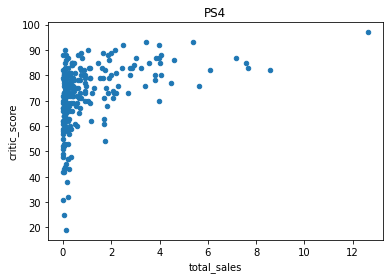

0.406567902061781


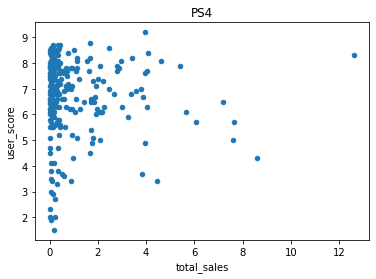

-0.031957110204556376


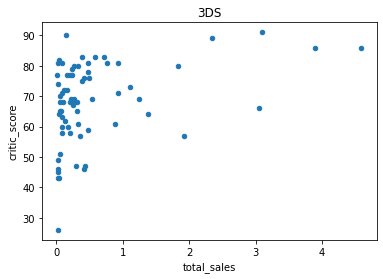

0.35705661422881035


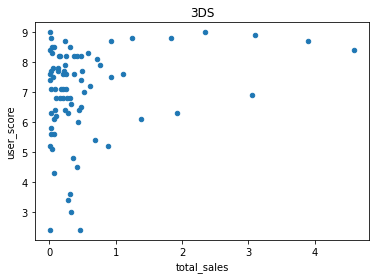

0.24150411773563016


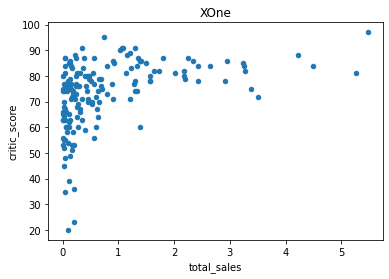

0.41699832800840175


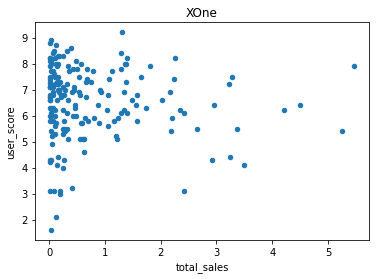

-0.06892505328279412


In [28]:
other_names = ['X360', '3DS', 'XOne', 'PS3']
for platform in top_5_platform['platform'].unique():
    top_5_platform.query('platform == @platform')\
    .plot(x = 'total_sales', y = 'critic_score', kind = 'scatter')
    plt.title(platform)
    plt.show()
    print(top_5_platform.query('platform == @platform')['total_sales']\
          .corr(top_5_platform.query('platform == @platform')['critic_score']))
    top_5_platform.query('platform == @platform')\
    .plot(x = 'total_sales', y = 'user_score', kind = 'scatter')
    plt.title(platform);
    plt.show()
    print(top_5_platform.query('platform == @platform')['total_sales']\
          .corr(top_5_platform.query('platform == @platform')['user_score']))

Для всех платформ картина повторяется: чем выше оценка критиков - тем больше продаж. Некоторым исключением является 3DS - там оценки критиков и игроков видимо больше похожи друг на друга, но все же у критиков корреляция больше.

## 8.Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим ящик с усами по каждому жанру

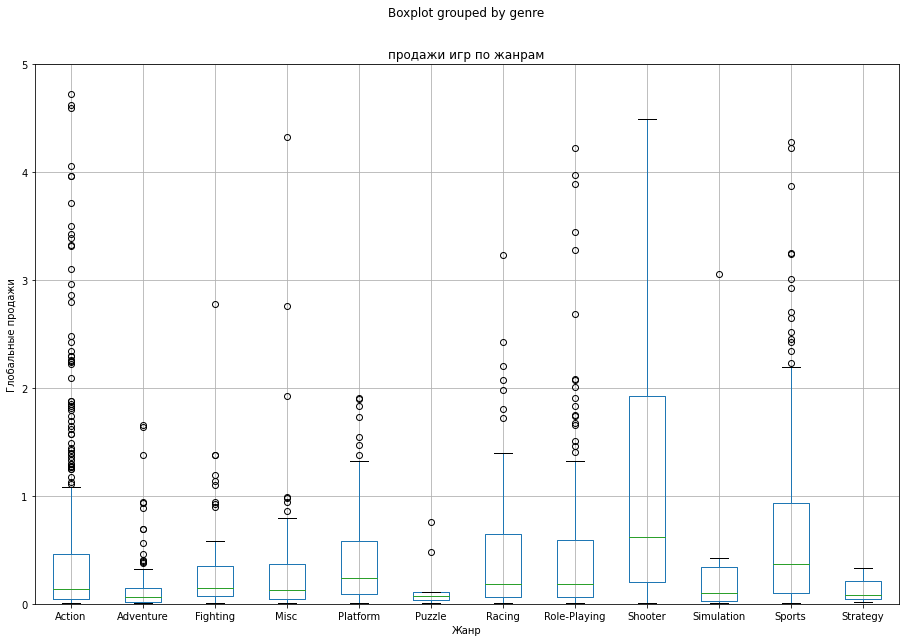

In [29]:
top_5_platform.boxplot(column='total_sales', by='genre', figsize=(15, 10))
plt.ylim(0, 5)
plt.title('продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи');

Очень сильно выделяются шутеры.Так же можно выделить спорт, ролевые и гонки. А вот головоломки популярностью не пользуются. 

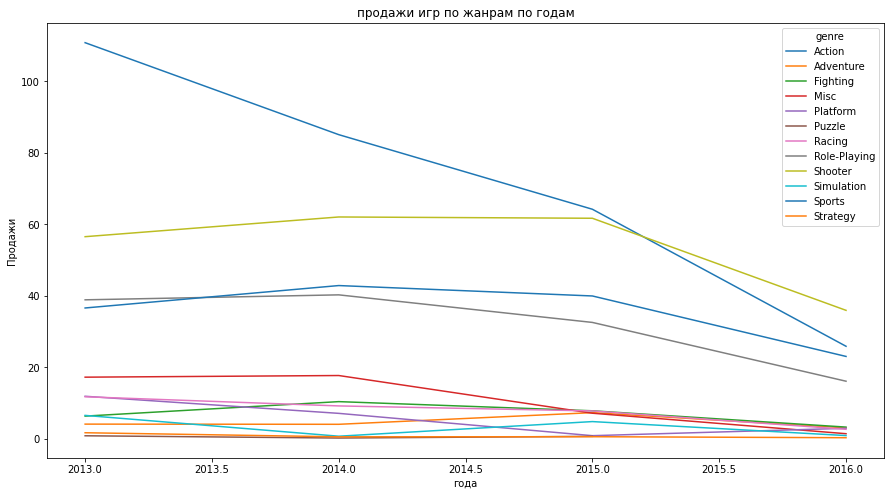

In [30]:
top_5_platform.pivot_table(index='year_of_release', columns='genre',
                     values='total_sales', aggfunc='sum').plot(figsize = (15, 8))
plt.title('продажи игр по жанрам по годам')
plt.xlabel('года')
plt.ylabel('Продажи');

На графике видна явная 4 лидеров по продажам: экшн, шутеры, спорт и ролевые.

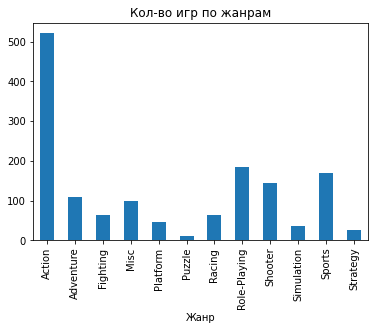

In [31]:
top_5_platform.groupby('genre')['genre'].count().plot(kind='bar')
plt.title('Кол-во игр по жанрам')
plt.xlabel('Жанр');


А вот тут экшн в разы превосходит другие жанры (скорее всего кол-ом игр и достиглись верхние позиции в предыдущем графике). Затем можно выделить ролевые, спортивные и шутеры.

Высокие продажи у экшена достигались за счет выпуска большого кол-ва игр. А вот шутеров выпускаются в 2 раза меньше, но продаж больше, в 2016г шутеры по сумме обогнали экшен. Спортивные и ролевые игры - хороший середнячок. Остальные игры, особенно головоломки, выглядят менее привлекательными.

# 4. Составьте портрет пользователя каждого региона

## 1. Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [32]:
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,not defined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
X360,81.66,42.52,0.51
XOne,93.12,51.59,0.34


,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.099164,0.092703,0.628045
PS3,0.164841,0.203042,0.216264
PS4,0.282280,0.422463,0.147819
X360,0.211983,0.127317,0.004724
XOne,0.241732,0.154475,0.003149


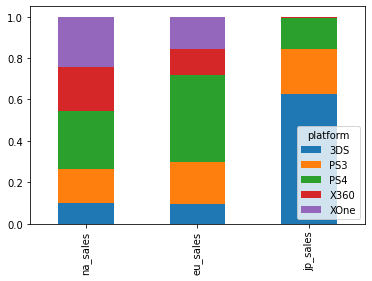

In [33]:
top = data_new.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales').tail(5).index
report = data_new.query('platform in @top').groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(report.head(5))

for col in report.columns:
    report[col] = report[col] / report[col].sum()
display(report.head(5))
report.T.plot(kind='bar', stacked = True);

Американский и европейский рынок более или менее одинаков. PS4 - явный лидер на европейском рынке (42%). Американский рынок более ровный, XOne(24%) немного успупает(28% у PS4), но в все-таки боксы - американской фирмы (Microsoft), так что их большая доля на американском рынке вполне логична. Японский рынок - это нечто! Можно сказать, что там только топ3. Как я и предполагала 3DS именно они вытянули - доля 62%!, далее тоже японские плойки (21% у PS3 и  14% y PS4), так что они патриоты) 

## 2. Самые популярные жанры (топ-5). Поясните разницу.

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Misc,27.49,20.04,9.20
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,5.41


,na_sales,eu_sales,jp_sales
genre,,,
Action,0.336178,0.365140,0.359113
Misc,0.073316,0.061944,0.081596
Role-Playing,0.123750,0.114274,0.452683
Shooter,0.292679,0.271575,0.058625
Sports,0.174077,0.187067,0.047982


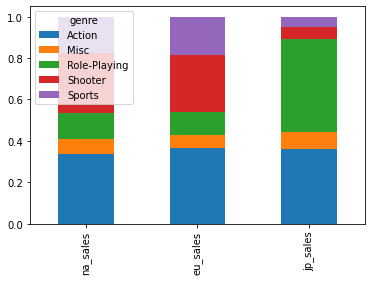

In [34]:
top_genre = data_new.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales').tail(5).index
report = data_new.query('genre in @top_genre').groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(report.head(5))

for col in report.columns:
    report[col] = report[col] / report[col].sum()
display(report.head(5))
report.T.plot(kind='bar', stacked = True);

Здесь картина тоже похожа на предыдущую. Американский и европейский рынок имеют минимальные различия. Самый популярный жанр - экшн (33 и 36% соответственно), затем шутеры (29 и 27%) и спортивные (17 и 18%). А вот японский рынок снова выделяется. Здесь 45% у ролевых, затем экшн (35%) и музыкальные (8%). Такое различие скорее всего так же из-за 3DS

## 3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
data_new['rating'].unique() # посмотрим на рейтинги

array(['M', 'not defined', 'E', 'T', 'E10+'], dtype=object)

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
not defined,89.42,78.91,85.05


,na_sales,eu_sales,jp_sales
rating,,,
E,0.180599,0.212528,0.107544
E10+,0.123918,0.108839,0.041838
M,0.377442,0.370497,0.100227
T,0.113751,0.106953,0.146257
not defined,0.204291,0.201183,0.604134


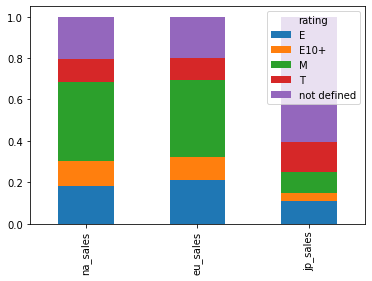

In [36]:
top_rating = data_new.groupby('rating').agg({'total_sales':'sum'}).sort_values(by='total_sales').tail(5).index
report = data_new.query('rating in @top_rating').groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(report.head(5))

for col in report.columns:
    report[col] = report[col] / report[col].sum()
display(report.head(5))
report.T.plot(kind='bar', stacked = True);

Ну что же! Снова американский и европейский рынки очень похожи. Самые популярные рейтига М(для всех старше 17лет) по 37%. по 20% у неопределенных рейтингов, 18% и 21% у Е(для всех от 6 лет). Замыкают пятерку Е10+(для всех от 10 лет) по 12% и 10% и Т(для лиц от 13 лет) по 11% и 10%. И снова японцы отличились. 60% у неизвестного рейтинга. Скорее всего это игры, выпускаемые только на азиатский рынок и имеющие свою классификацию). Т - 14%, М и Е по 10%, Е10+ - 4%. Рейтинг опреденно влияет на продажи, большие продажи у игр для взрослых. Но прежде чем заходить на японский рынок, нужно изучить их рейтинги.

# 5. Проверьте гипотезы

## 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Гипотезы**

* H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: средний пользовательский рейтинг платформ Xbox One и PC различается

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

In [37]:
alpha = 0.05 #стандартное пороговое значение 

xbox = data_new[(data_new['platform'] == 'XOne') & (data_new['user_score'] > 0)]['user_score']
pc = data_new[(data_new['platform'] == 'PC') & (data_new['user_score'] > 0)]['user_score']

results = st.ttest_ind(xbox, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Гипотезы**

* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

* H1: средний пользовательский рейтинг жанров Action и Sports различается

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

In [38]:
alpha = 0.05 #стандартное пороговое значение 

action = data_new[(data_new['genre'] == 'Action') & (data_new['user_score'] > 0)]['user_score']
sports = data_new[(data_new['genre'] == 'Sports') & (data_new['user_score'] > 0)]['user_score']

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


# 6. Общий вывод.

У игровой индустрии не лучшие времена, к созданию игры нужно подходить обстоятельно.

1. Для начала платформа. Создавать игру нужно на новых платформах - они самые перспективные (XOne и PS4). Если делать эксклюзив - то определенно PS4, таким образом будут покрыты все рынки. Но и лишать себя потенциальных 20% рынка Америки и Европы не логично. Так что, если это не сильно ударит по бютжету, то создавать игру на 2х платформах, максимально покрывая потенциальны рынок.

2. Жанр. 2 самых популярных жанра - экшн и шутер. Тут и думать нечего, круче всего вообще объединить их, это не так и сложно)

3. По рейтингу. Тут тоже вполне логично: больше всего покупаются игры для людей старше 17 лет, да и шутеры скорее всего имеют это ограничение. Так что нечего, как и в киноиндустрии бояться высокого рейтинга, основные потребители игр сейчас - взрослые люди, которые выросли на играх в 90х и 00х.

